<a href="https://colab.research.google.com/github/Khadeeja-Moin/Colab---VGG19/blob/main/ResNet/Attempt%204/ResNet_50_(brain_MRI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.layers import Flatten, Dense

In [3]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing'

In [7]:
# re-size all the images to this because images in dataset are f varying sizes
IMAGE_SIZE = [224, 224]

In [8]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')


Found 4571 images belonging to 4 classes.


In [10]:
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 subset = 'validation')

Found 1141 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1311 images belonging to 4 classes.


In [12]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   classes=4,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

# Unfreeze the last 4 layers
for layer in pretrained_model.layers[-6:]:
    layer.trainable = True

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(32, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,012,516 (114.49 MB)

 Trainable params: 7,480,548 (28.54 MB)

 Non-trainable params: 22,531,968 (85.95 MB)

In [14]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
epochs=30

history = resnet_model.fit(
  training_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 1165s 8s/step - accuracy: 0.5520 - loss: 1.6929 - val_accuracy: 0.3094 - val_loss: 2.1020
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 95s 614ms/step - accuracy: 0.6821 - loss: 0.7901 - val_accuracy: 0.3585 - val_loss: 1.3544
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 141s 616ms/step - accuracy: 0.7175 - loss: 0.6785 - val_accuracy: 0.5784 - val_loss: 0.9702
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 142s 617ms/step - accuracy: 0.7270 - loss: 0.6858 - val_accuracy: 0.6775 - val_loss: 0.8106
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 91s 610ms/step - accuracy: 0.7662 - loss: 0.5938 - val_accuracy: 0.6214 - val_loss: 0.9256
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 93s 629ms/step - accuracy: 0.7703 - loss: 0.5568 - val_accuracy: 0.6398 - val_loss: 0.9263
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 140s 608ms/step - accuracy: 0.7925 - loss: 0.5227 - val_accuracy: 0.6775 - val_loss: 0.8416
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 613ms/step - accuracy: 0.7748 - loss: 0.5414 - v

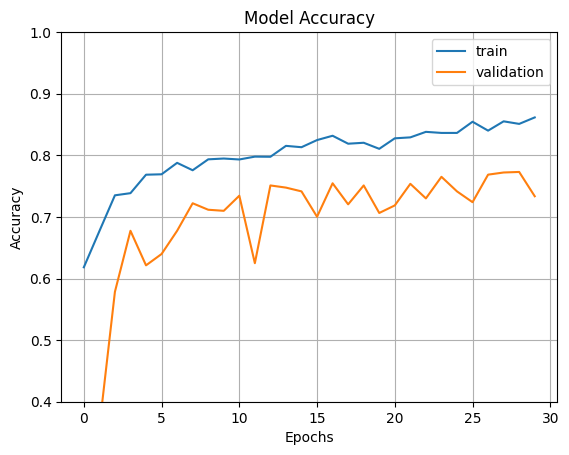

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

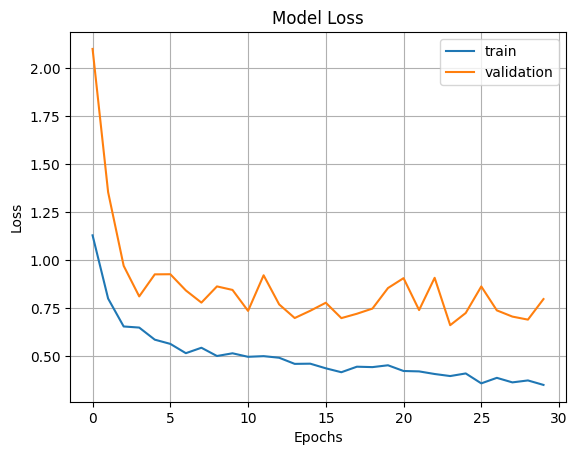

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(test_set)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 350s 9s/step - accuracy: 0.7883 - loss: 0.6625
Test Loss: 0.6972029805183411
Test Accuracy: 0.7833714485168457


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [20]:
def get_labels_and_predictions(generator, model):
    true_labels = []
    predictions = []

    # Iterate over the generator
    for i in range(len(generator)):
        x_batch, y_batch = generator[i]
        y_pred = model.predict(x_batch)

        true_labels.extend(np.argmax(y_batch, axis=1))  # Assuming y_batch is one-hot encoded
        predictions.extend(np.argmax(y_pred, axis=1))

    return np.array(true_labels), np.array(predictions)


In [21]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [22]:
# Get true labels and predictions for the training set
true_labels_train, predictions_train = get_labels_and_predictions(training_set, resnet_model)

# Get true labels and predictions for the test set
true_labels_test, predictions_test = get_labels_and_predictions(test_set, resnet_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━

In [23]:
# Compute the confusion matrices
cm_train = confusion_matrix(true_labels_train, predictions_train)
cm_test = confusion_matrix(true_labels_test, predictions_test)

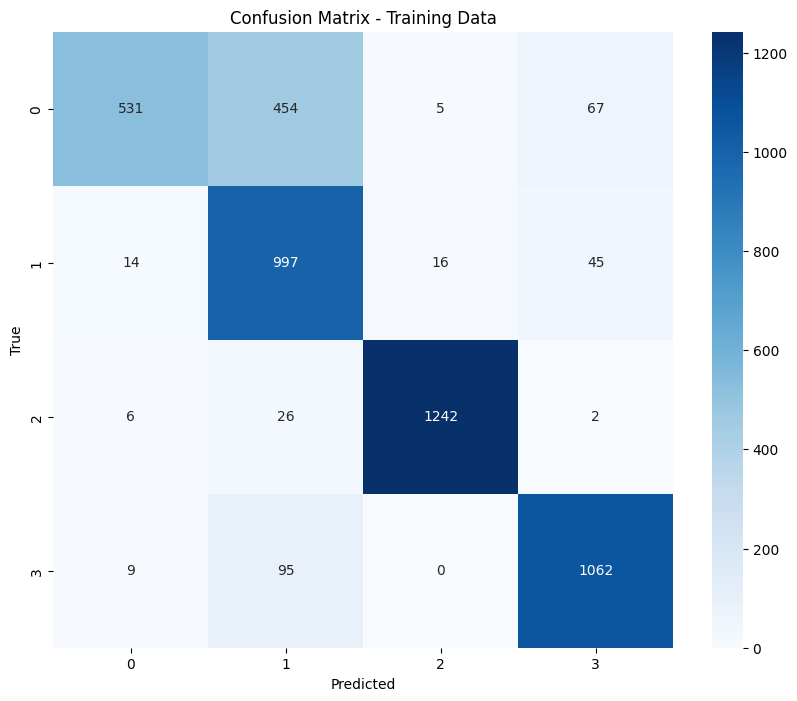

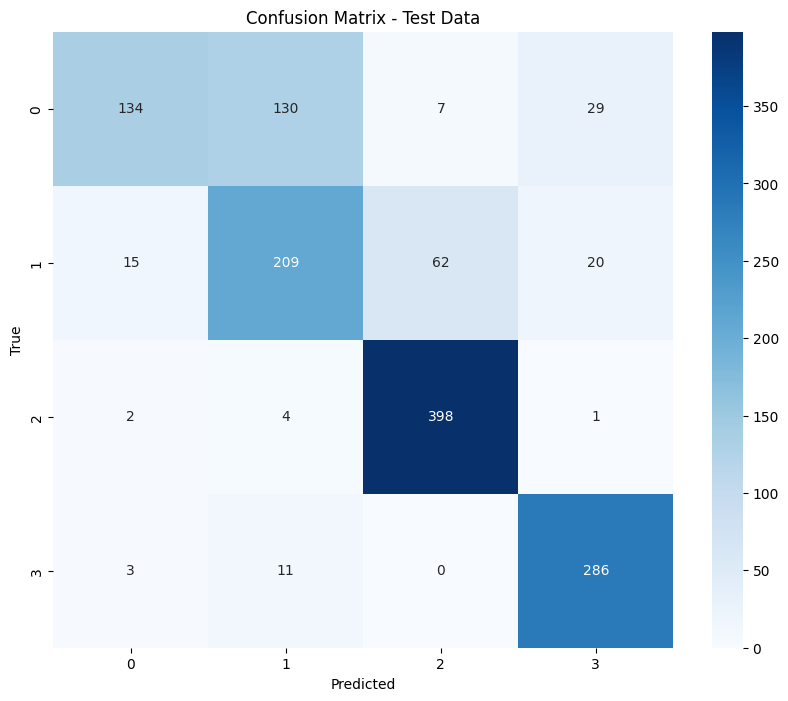

In [24]:
# Plot the confusion matrices
plot_confusion_matrix(cm_train, title='Confusion Matrix - Training Data')
plot_confusion_matrix(cm_test, title='Confusion Matrix - Test Data')

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [26]:
# For training data
precision_train = precision_score(true_labels_train, predictions_train, average='weighted')
recall_train = recall_score(true_labels_train, predictions_train, average='weighted')
f1_train = f1_score(true_labels_train, predictions_train, average='weighted')

print(f'Training Precision: {precision_train}')
print(f'Training Recall: {recall_train}')
print(f'Training F1 Score: {f1_train}')

# For test data
precision_test = precision_score(true_labels_test, predictions_test, average='weighted')
recall_test = recall_score(true_labels_test, predictions_test, average='weighted')
f1_test = f1_score(true_labels_test, predictions_test, average='weighted')

print(f'Test Precision: {precision_test}')
print(f'Test Recall: {recall_test}')
print(f'Test F1 Score: {f1_test}')

Training Precision: 0.8728732829684024
Training Recall: 0.8383285933056224
Training F1 Score: 0.8331858044511531
Test Precision: 0.794979191774974
Test Recall: 0.7833714721586575
Test F1 Score: 0.7707137045235074
